Chapter 5 of [a Guided Tour of Mathematical Methods for the Physical Sciences](http://www.cambridge.org/nz/academic/subjects/physics/mathematical-methods/guided-tour-mathematical-methods-physical-sciences-3rd-edition) introduces the gradient of a scalar function, and the operator $\nabla$; a crucial building block for divergence and curl that will follow. But the gradient "an sich" can help us explain physics directly. Whether or not we are able to scale a mountain (at least in part) depends on its gradient, for example. Let us read in elevation data for part of Auckland, New Zealand:

In [1]:
import io
import urllib.request
import numpy as np

url = "https://ndownloader.figshare.com/files/9956302"
response = urllib.request.urlopen(url)
data = response.read()
bytes = io.BytesIO(data)
topo = np.load(bytes)

If you didn't follow what happened above, you can alternatively download the data from the url in your current working directory and do:

In [2]:
import numpy as np
topo = np.load("./OneTreeHillTopo.npy") 

Either way, now you have the data in the array "topo", and can display this with:

<IPython.core.display.Javascript object>


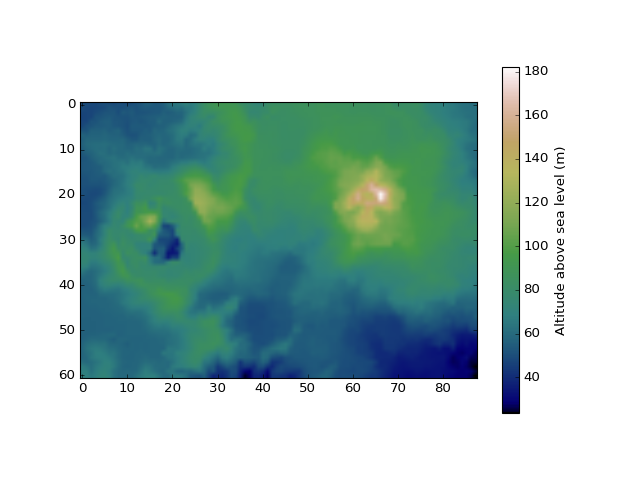

In [3]:
import matplotlib.pyplot as plt
%matplotlib notebook
from matplotlib import cm
fig = plt.figure()
#plt.axis('off')
plt.imshow(topo,cmap=cm.gist_earth)
cbar = plt.colorbar(shrink=0.9)
cbar.set_label('Altitude above sea level (m)')
plt.show()

These topographic data span 4x3 km, courtesy of a LIDAR survey shared by LINZ. The highest point is the 182 m top of One Tree Hill, on the right half of the graph. The dark blue anomaly to the left of One Tree Hill is a quarry. 

On this photo from [its wikipedia page](https://en.wikipedia.org/wiki/One_Tree_Hill_(New_Zealand%29), you can see what this "Hill" looks like:
![One Tree Hill](https://upload.wikimedia.org/wikipedia/commons/8/88/One_Tree_Hill%2C_Auckland%2C_March_2015.jpg)
One Tree hill is not only famous thanks to the [U2 song](https://en.wikipedia.org/wiki/One_Tree_Hill_(song%29), it is also one of more than 50 volcanoes that define the [Auckland Volcanic Field](https://en.wikipedia.org/wiki/Auckland_volcanic_field). (In the background of the photo, you can see Rangitoto Island, the youngest volcano of the AVF, having last erupted around 600 years before present.)

The gradient of the topography $f$ in Cartesian coordinates is $$ \nabla f = \frac{\partial f}{\partial x}\hat{x} + \frac{\partial f}{\partial y}\hat{y},$$ and the numpy package in python has a code that computes this for you:

In [4]:
fy,fx = np.gradient(topo,50)

Note the order of the components. Python works always first on the rows, then on the columns. The partial derivatives between the rows is the y-direction. The "50" argument is the spatial sampling rate in metres. While the data are available at 1m spacing, we down-sampled to 50m spacing to reduce file size. We can now plot the gradient over the top of the elevation map.

<IPython.core.display.Javascript object>


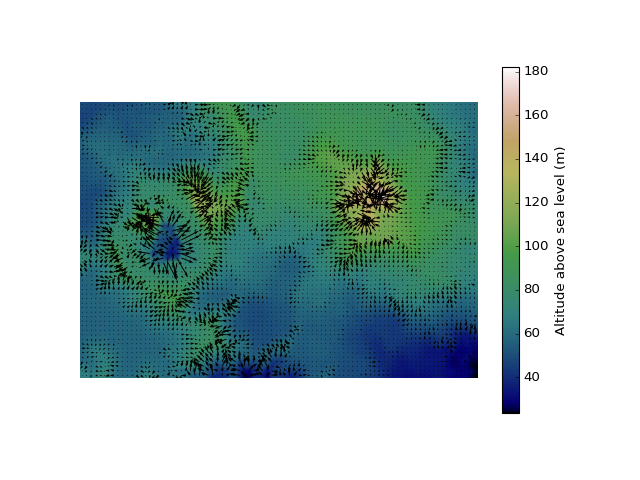

In [5]:
ymax,xmax = fx.shape
fig = plt.figure()
plt.axis('off')
plt.quiver(np.arange(xmax),np.arange(ymax),fx,-fy)
plt.imshow(topo,cmap=cm.gist_earth)
cbar = plt.colorbar(shrink=0.9)
cbar.set_label('Altitude above sea level (m)')
plt.show()

When you zoom in when running the notebook yourself, you can see better the arrows superposed onto the topography map. Close to the quarry and the volcano, things clearly get steep! In other words, the gradient is large. Note that the arrows point "uphill" by virtue of the definition of the gradient. The careful plotter noticed that quiver plotted the negative values fy. This is because quiver and imshow have different definition of the origin...

It is clear from the arrows and the mathematical definition that the gradient of a scalar field such as topography, is a vector. To display the gradient, we had to use arrows with a length and a direction. If we are only interested in the magnitude of the gradient, we can display this with:

<IPython.core.display.Javascript object>


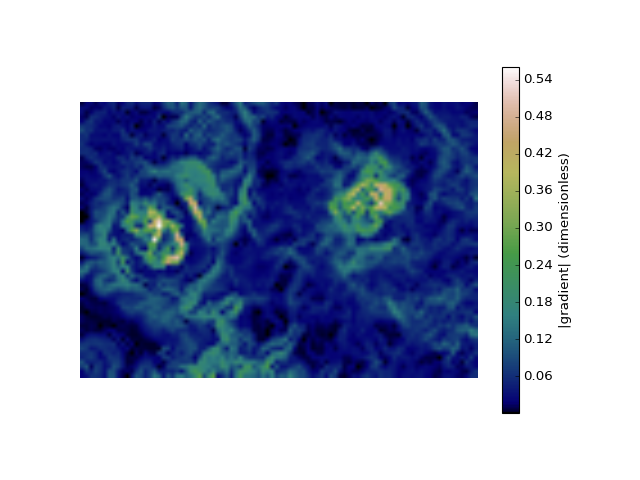

In [6]:
fig = plt.figure()
plt.axis('off')
plt.imshow(np.sqrt(fx**2+fy**2),cmap=cm.gist_earth)
cbar = plt.colorbar(shrink=0.9)
cbar.set_label('|gradient| (dimensionless)')
plt.axis('off')
plt.show()


We can now clearly see the steep parts of this area, but we've lost info about the direction of the slope. Both the negative and the positive anomaly show up as areas with larger gradients.

Now we have established a better intuition about the gradient of a scalar field $f$, $\nabla f$, we can use our newly found knowledge to define vector operations on $\nabla$, such as the divergence and the curl, the topics of the next chapters. To go back to the jupyter notebooks on the rest of the book Chapters, [click here](https://pal.blogs.auckland.ac.nz/2017/12/02/jupyter-notebooks-for-mathematical-methods-in-the-physical-sciences/).